In [1]:
import requests
import json
import time
import math
import os
from random import choice
import re

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [ ]:
BASE_URL = 'https://www.fairprice.com.sg/'

In [ ]:
def random_headers():
    '''
    Choose a random user_agent to use as an header for requests
    list of http header fields: https://en.wikipedia.org/wiki/List_of_HTTP_header_fields
    '''
    user_agents = ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36',
                   'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36',
                   'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36',
                   'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/602.2.14 (KHTML, like Gecko) Version/10.0.1 Safari/602.2.14',
                   'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36',
                   'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36',
                   'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36',
                   'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36',
                   'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36',
                   'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0',
                   'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36']

    # return {'User-Agent': choice(user_agents), 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}
    return {'User-Agent': choice(user_agents), 'Accept': 'text/html'}


In [ ]:
def requestForPage(url):
    # headers = {'User-Agent': ''}
    r = requests.get(url, headers=random_headers())
    return r.text


# Getting the Links

In [ ]:
soup = BeautifulSoup(requestForPage(BASE_URL), 'lxml')

In [ ]:
soup.find('a', {'class':'selSecondNav'}).get('href')

In [ ]:
top_links = [link.get('href') for link in soup.find_all('a', {'class':'selSecondNav'})]
top_links

# Selenium

In [2]:
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")
chrome_driver = os.path.join(
    os.getcwd(),'..', '..', 'WebScraping', 'seleniumdrivers', 'chromedriver')
browser = webdriver.Chrome(
        chrome_options=chrome_options, executable_path=chrome_driver)

In [3]:
browser.get('https://www.fairprice.com.sg/beer-wine-spirits/beer/ale-lager-malt')

In [ ]:
soup = BeautifulSoup(browser.page_source, 'lxml')
soup.find('div', id= 'noFilterMsg')['class'][0]

In [ ]:
browser.get('https://www.fairprice.com.sg/beer-wine-spirits/beer/alcopop-cider')

In [ ]:
soup = BeautifulSoup(browser.page_source, 'lxml')
soup.find('div', id='noFilterMsg')['class'][0]

In [ ]:
'prodLoadMoreBck hide_element' in browser.page_source

In [ ]:
'prodLoadMoreBck' in browser.page_source

In [ ]:
while True:
    if 'prodLoadMoreBck hide_element'in browser.page_source:
        break
    elif 'prodLoadMoreBck' in browser.page_source:
        try:
            browser.find_element_by_link_text('LOAD MORE').click()
        except:
            pass

# Getting data

In [151]:
browser.get('https://www.fairprice.com.sg/product/pigeon-baby-laundry-detergent-refill-500ml-13101742')

In [152]:
soup = BeautifulSoup(browser.page_source, 'lxml')

In [86]:
image_url = 'https://s3-ap-southeast-1.amazonaws.com/www8.fairprice.com.sg/fpol/media/images/product/XL/'

In [6]:
soup.find('div', class_ = 'pdpImgWrapper').img['data-large-img-url'].split('/')[-1]

'13101742_XL1.jpg'

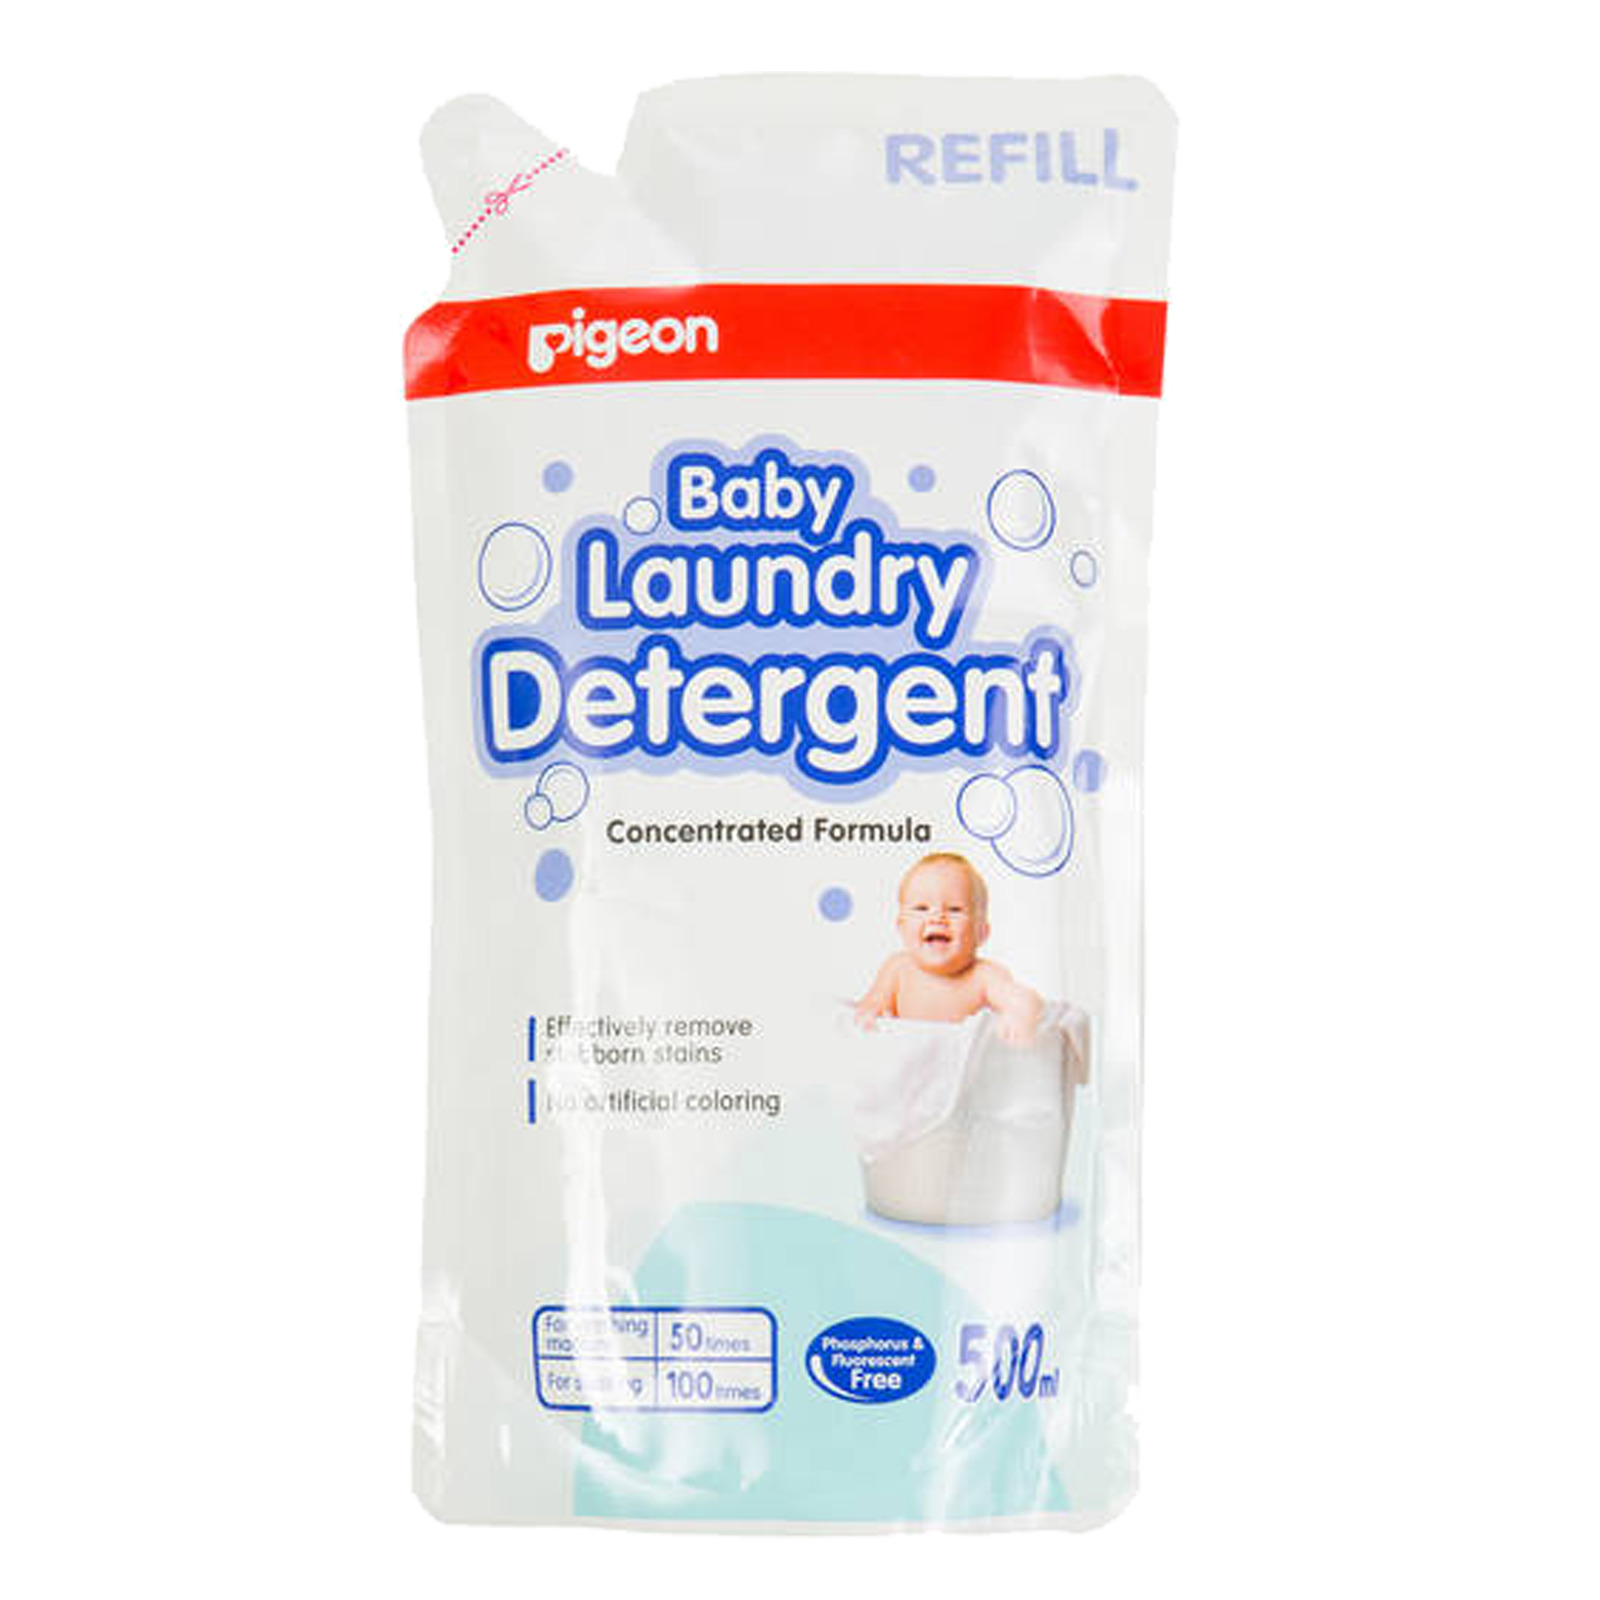

In [7]:
from IPython.display import Image
Image(image_url + soup.find('div', class_ = 'pdpImgWrapper').img['data-large-img-url'].split('/')[-1])

In [8]:
soup.find('h1').text

'Pigeon Baby Laundry Detergent Refill Pack - Liquid'

In [12]:
soup.find('span', class_ = 'pdt_weightMg').text.strip()

'500ml'

In [13]:
soup.find('span', class_ = 'pdt_C_price' ).text.strip()

'$6.90'

In [22]:
test = soup.find('div', class_ = 'pdt_desc_d_row pdpDesc clearfix').p.text
test.strip().split('•')[1:]

[" Gentle on baby's skin",
 ' Clean effectively',
 ' Contains no artificial colouring']

In [23]:
print(re.sub('\s+', '',soup.find('div', class_ = 'pdt_desc_d_row pdpDesc clearfix').div.text))
print(soup.find('div', class_ = 'pdt_desc_d_row pdpDesc clearfix').p.text.strip().split('•')[1:])

KEYINFORMATION
[" Gentle on baby's skin", ' Clean effectively', ' Contains no artificial colouring']


In [36]:
pdtInfo = dict()

In [87]:
len(soup.find_all('div', class_ = 'pdt_desc_d_row clearfix'))

4

In [28]:
for i in soup.find_all('div', class_ = 'pdt_desc_d_row clearfix'):
    pdtInfo[i.find('div', class_ = 'pdr_name').text.strip()] = (i.find('div', class_ = 'pdr_p_desc').text.strip())

In [31]:
print(pdtInfo.keys())
print(pdtInfo.values())

dict_keys(['COUNTRY OF ORIGIN', 'PREPARATION', 'STORAGE', 'INGREDIENTS'])
dict_values(['China', 'For Hand Wash:1. Put 5ml into 5L of lukewarm water of around 40°C and stir2. Soak completely for 2 - 3 hours (remove physical dirt first)3. Either hand wash or machine wash after soaking', 'Always keep out of reach of infants\nand children', 'Surfactant [22% Soap (Fatty Acid, Potassium Salt) and Alkyl Alcohol Polyoxyethylene Ether], Metal Chelating Agent (EDTA), Alkali Agent (Diethanolamine)'])


In [32]:
pdtInfo['COUNTRY OF ORIGIN']

'China'

In [33]:
pdtInfo['PREPARATION']

'For Hand Wash:1. Put 5ml into 5L of lukewarm water of around 40°C and stir2. Soak completely for 2 - 3 hours (remove physical dirt first)3. Either hand wash or machine wash after soaking'

In [34]:
pdtInfo['STORAGE']

'Always keep out of reach of infants\nand children'

In [35]:
pdtInfo['INGREDIENTS']

'Surfactant [22% Soap (Fatty Acid, Potassium Salt) and Alkyl Alcohol Polyoxyethylene Ether], Metal Chelating Agent (EDTA), Alkali Agent (Diethanolamine)'

In [153]:
for i in soup.find_all('div', class_ = 'pdt_desc_d_row clearfix'):
    header = i.find('div', class_ = 'pdr_name').text.strip()
    content = i.find('div', class_ = 'pdr_p_desc').text.strip()
    if len(header) == 0:
        dietDict = dict()
        content = i.find('div', class_ = 'pdr_p_desc').text
        cleaned_text = []
        for char in re.sub('\s+', ' ', content).split(' '):
            if len(char) > 1:
                cleaned_text.append(char)
        dietDict[cleaned_text[0]] = cleaned_text[1:]
    
        print(dietDict)
        print("=====")
        continue
    print(header)
    print(content)
    print("======")

COUNTRY OF ORIGIN
China
PREPARATION
For Hand Wash:1. Put 5ml into 5L of lukewarm water of around 40°C and stir2. Soak completely for 2 - 3 hours (remove physical dirt first)3. Either hand wash or machine wash after soaking
STORAGE
Always keep out of reach of infants
and children
INGREDIENTS
Surfactant [22% Soap (Fatty Acid, Potassium Salt) and Alkyl Alcohol Polyoxyethylene Ether], Metal Chelating Agent (EDTA), Alkali Agent (Diethanolamine)


# Another product

In [89]:
browser.get('https://www.fairprice.com.sg/product/organic-bubs-baby-food-corn-pumpkin-chia-120g-13092479')

In [90]:
soup = BeautifulSoup(browser.page_source, 'lxml')

In [40]:
image_url = 'https://s3-ap-southeast-1.amazonaws.com/www8.fairprice.com.sg/fpol/media/images/product/XL/'

In [41]:
image_url + soup.find('div', class_ = 'pdpImgWrapper').img['data-large-img-url'].split('/')[-1]

'https://s3-ap-southeast-1.amazonaws.com/www8.fairprice.com.sg/fpol/media/images/product/XL/13092479_XL1.jpg'

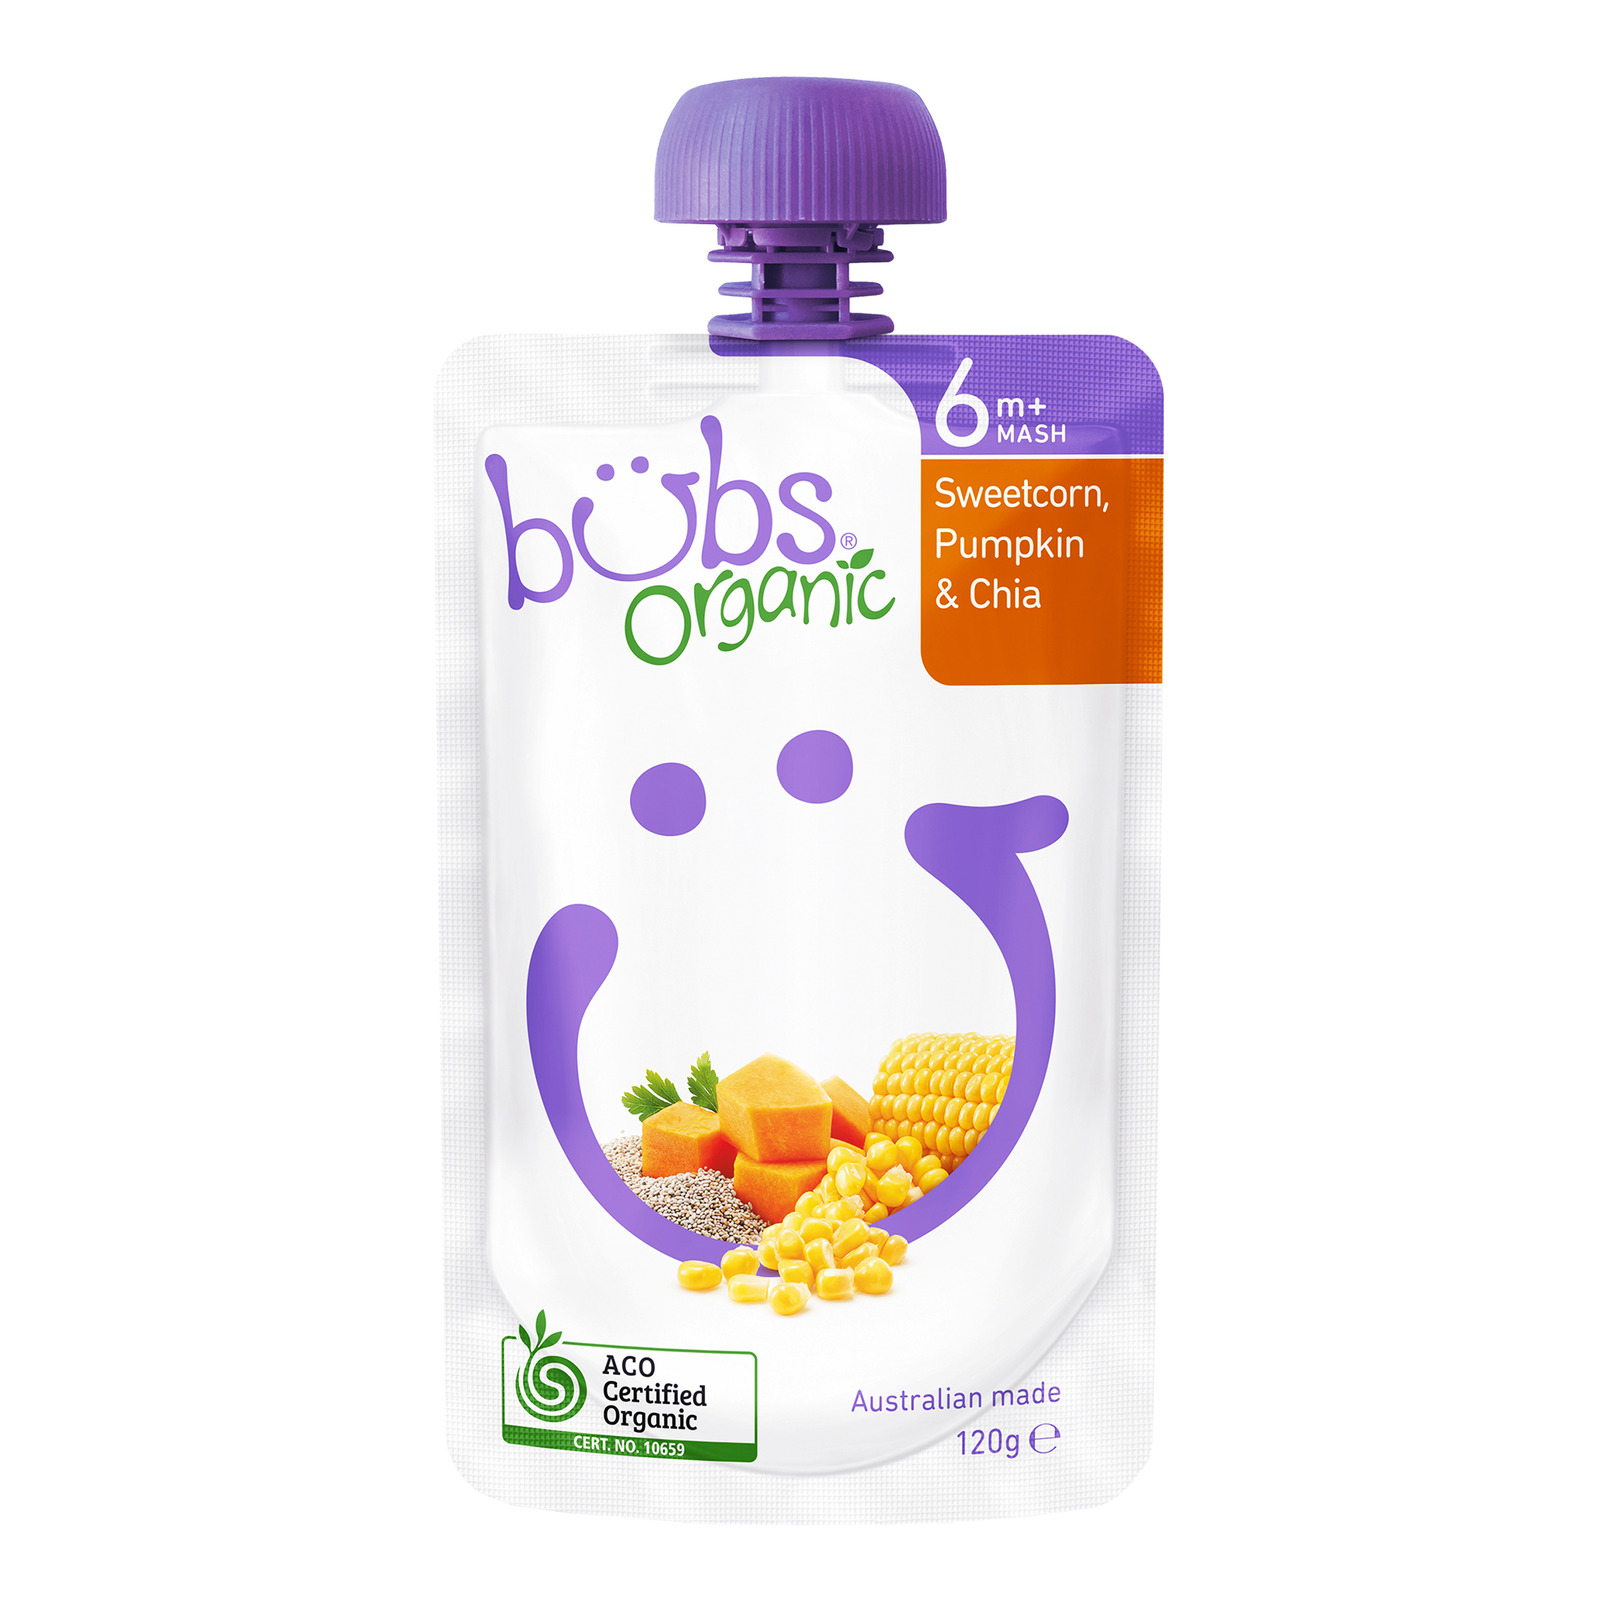

In [42]:
from IPython.display import Image
Image(image_url + soup.find('div', class_ = 'pdpImgWrapper').img['data-large-img-url'].split('/')[-1])

In [43]:
soup.find('h1').text

'Organic Bubs Baby Food - Corn & Pumpkin with Chia'

In [44]:
soup.find('span', class_ = 'pdt_weightMg').text.strip()

'120g'

In [45]:
soup.find('span', class_ = 'pdt_C_price' ).text.strip()

'$3.25'

In [46]:
print(soup.find('div', class_ = 'pdt_desc_d_row pdpDesc clearfix').div.text.strip())
print(soup.find('div', class_ = 'pdt_desc_d_row pdpDesc clearfix').p.text.split('•'))

KEY INFORMATION
['Organic Bubs premium baby meals are crammed with nothing but wholesome organic food to nourish little one, keep their tiny growing bodies. It is pure and natural with no preservatives, artificial flavours and nasties.']


In [150]:
for i in soup.find_all('div', class_ = 'pdt_desc_d_row clearfix'):
    header = i.find('div', class_ = 'pdr_name').text.strip()
    content = i.find('div', class_ = 'pdr_p_desc').text.strip()
    if len(header) == 0:
        dietDict = dict()
        content = i.find('div', class_ = 'pdr_p_desc').text
        cleaned_text = []
        for char in re.sub('\s+', ' ', content).split(' '):
            if len(char) > 1:
                cleaned_text.append(char)
        dietDict[cleaned_text[0]] = cleaned_text[1:]
    
        print(dietDict)
        print("=====")
        continue
    print(header)
    print(content)
    print("======")

COUNTRY OF ORIGIN
Australia
{'DIETARY': ['Organic', 'Halal']}
=====
PREPARATION
1. Serve at room temperature or warm pouch in hot water2. Shake and squeeze into a bowl or spoon and check temperature before serving• Warning:1. Keep small cap out of reach of infants and children under 3 years of age at all times2. Do not microwave pouch
STORAGE
• Store in the pantry• Once open, reseal and keep refrigerated for up to 48 hours
INGREDIENTS
Organic Pumpkin (50%), Organic Sweetcorn (30%), Chia Gel (20%) [Cooking Water, Chia Seeds (< 1%)]
NUTRITION FACTS
AttributesPer Serving (120g)Energy271kJCarbohydrate10.6gProtein2.5gTotal Fat0.8gSaturated Fat0.1gSugars4.5gSodium2mg


In [132]:
dietary = soup.find_all('div', class_="pdt_desc_d_row clearfix")[1]

In [133]:
dietary

<div class="pdt_desc_d_row clearfix">
<div class="pdr_name">
<span class="bld_blu" id="descAttributeName_2_9_-2018_3074457345618268518">
</span>
</div>
<div class="pdr_p_desc">
<div class="nutrition_table">
<p id="descAttributeValue_2">
														DIETARY
													</p>
<div class="pdr_p_desc fLeft">
<div class="pdt_halo">
<a class="pdt_h_txt gray organic" onmouseover="popUpRev(this);">O</a>
<span class="tool_tip_copdis1">
																			Organic
																		</span>
</div>
</div>
<div class="pdr_p_desc fLeft">
<div class="pdt_halo">
<a class="pdt_h_txt gray halal" onmouseover="popUpRev(this);">H</a>
<span class="tool_tip_copdis1">
																			Halal
																		</span>
</div>
</div>
</div>
</div>
</div>

In [138]:
content = dietary.find('div', class_ = 'pdr_p_desc').text
header = dietary.find('div', class_ = 'pdr_name').text.strip()

In [143]:
import re
for char in re.sub('\s+', ' ', content).split(' '):
    if len(char) > 1:
        print(char)

DIETARY
Organic
Halal


In [109]:
for i in content.strip():
    if i != '\n' 

'DIETARY\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\nO\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOrganic\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\nH\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tHalal'

In [114]:
content.replace('\n', '').replace('\t', '')

'DIETARYOOrganicHHalal'

In [136]:
content.encode('utf8')

b'DIETARY\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\nO\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOrganic\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\nH\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tHalal'